#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score,StratifiedKFold
#from sklearn import metrics

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [5]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.metrics import classification_report
import pickle

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#read the dataset
df_dataset=pd.read_csv("HR_Dataset.csv")

In [8]:
type(df_dataset)

pandas.core.frame.DataFrame

In [9]:
#concise summary of dataframe
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
#display the first five rows of dataframe
df_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
#display the last five rows of dataframe
df_dataset.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [12]:
#identify shape of the dataframe
df_dataset.shape

(14999, 10)

In [13]:
#view the columns of dataset
print(df_dataset.columns.values)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'Departments ' 'salary']


In [14]:
#view index of the dataset
df_dataset.index

RangeIndex(start=0, stop=14999, step=1)

In [15]:
#check for any duplicate rows
df_dataset.duplicated().sum()

3008

In [16]:
#drop the duplicates 
df_dataset.drop_duplicates(keep='first',inplace=True,ignore_index=True)

In [17]:
#check for any variables with null values
df_dataset.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [18]:
#check the statistics of data
df_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


In [19]:
#select the numerical variables  from dataset
num_variables=df_dataset.select_dtypes(exclude='object')
num_variables.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [20]:
#select the categorical variables  from dataset
cate_variables=df_dataset.select_dtypes(include='object')
cate_variables.columns

Index(['Departments ', 'salary'], dtype='object')

In [21]:
#view the unique items in categorical variables and its count
for col in df_dataset.select_dtypes(include='object'):
    print("The count of unique values in",col,":",df_dataset[col].nunique())
    print(df_dataset[col].unique())
    print("-"*40,"*"*10,"-"*40)
    print("")

The count of unique values in Departments  : 10
['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
---------------------------------------- ********** ----------------------------------------

The count of unique values in salary : 3
['low' 'medium' 'high']
---------------------------------------- ********** ----------------------------------------



In [22]:
#view the unique items in categorical variables and its count
for col in df_dataset.select_dtypes(exclude='object'):
    print("The count of unique values in",col,":",df_dataset[col].nunique())
    print(df_dataset[col].unique())
    print("-"*40,"*"*10,"-"*40)
    print("")

The count of unique values in satisfaction_level : 92
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
---------------------------------------- ********** ----------------------------------------

The count of unique values in last_evaluation : 65
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
-------

#### Exploratory data analysis (Visualisation)

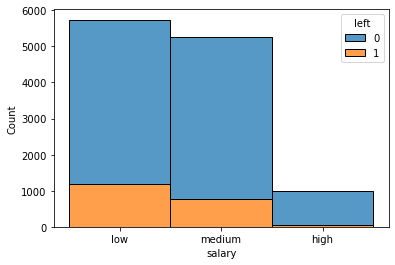

In [23]:
sns.histplot(data=df_dataset,hue="left",x='salary',multiple='stack');

#### Majority of employees who left were with low salary and only a few left with good salary

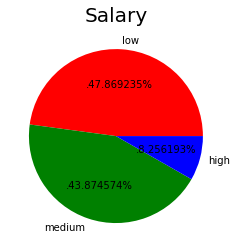

In [24]:
size = df_dataset['salary'].value_counts()
labels = 'low', 'medium','high'
color = ['red','green','blue']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Salary', fontsize = 20);

##### Now consider the case of employees who left the company even with high salary

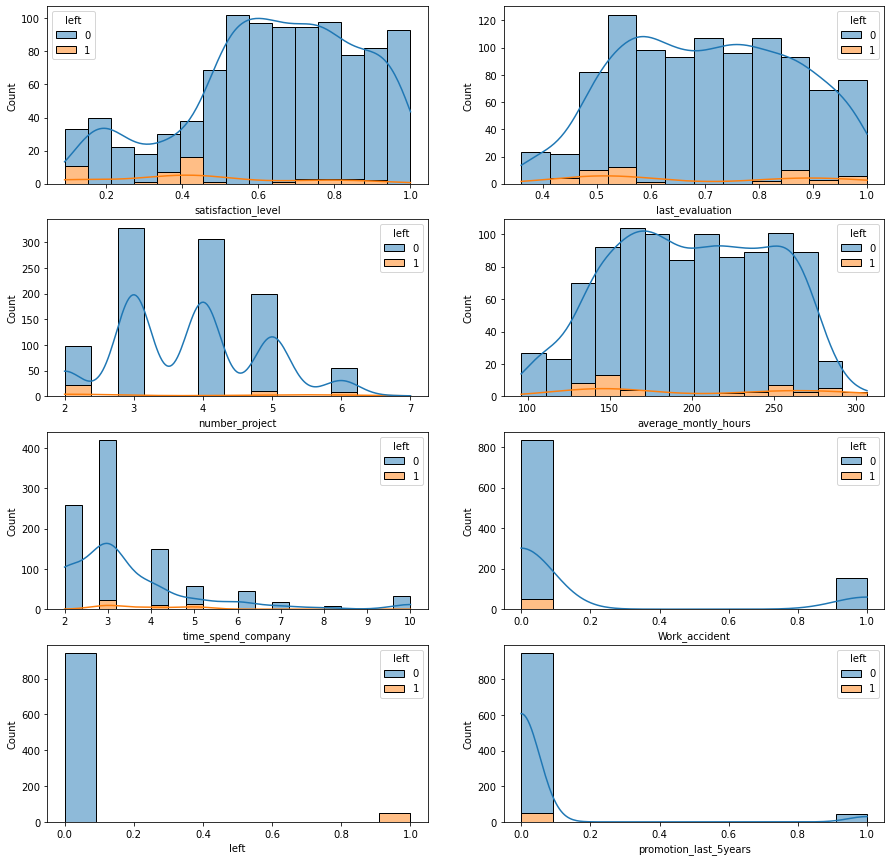

In [25]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_dataset.drop(['Departments '],axis=1),ax.flatten()):
    sns.histplot(data=df_dataset[df_dataset.salary=='high'],hue="left",x=column,multiple='stack',kde=True,ax=subplot);    

#### Even with high salary,employee left the company may be because they didnt get promotion or high average monthly hours or work load or poor performance

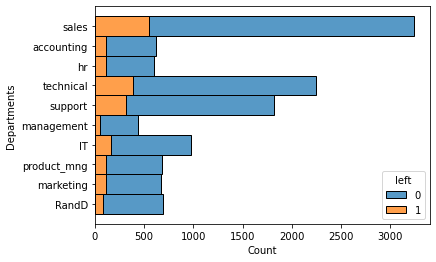

In [26]:
sns.histplot(data=df_dataset,hue="left",y='Departments ',multiple='stack');

##### majority left from sales and minority from management

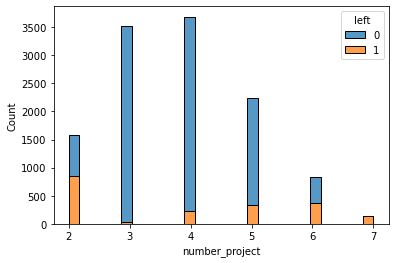

In [27]:
sns.histplot(data=df_dataset,hue="left",x='number_project',multiple='stack');

##### Employees with good experience/performance with more number of projects handled also left the company in addition to the other scenario

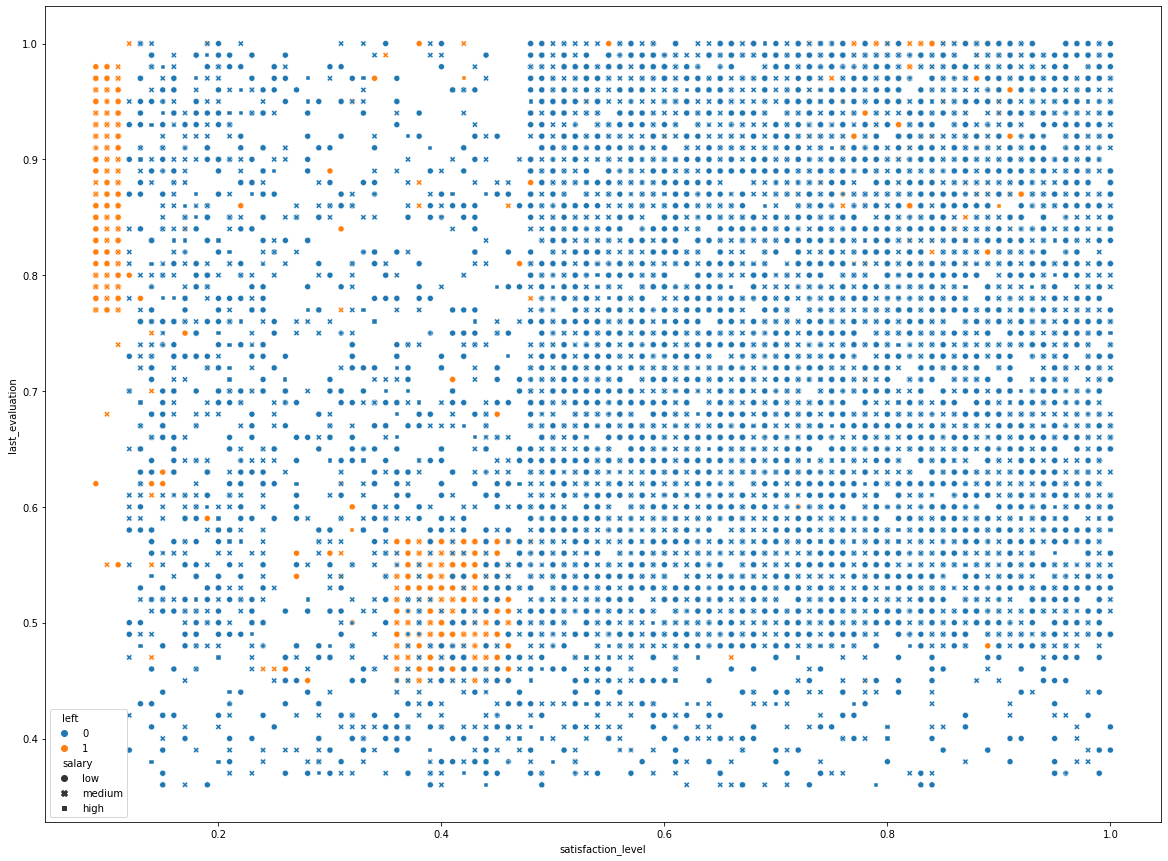

In [28]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_dataset,x='satisfaction_level',y='last_evaluation',hue='left',style='salary');

#### 1.Many of the employees who left the company were with low satisfaction level and above average performance,but they were only with low and medium salary package.
#### 2.Some employees who left the company with moderate satisfaction level but with below average performance and their salary was also pretty much good.
#### 3.But there are some exceptions with good salary and performance but left the company


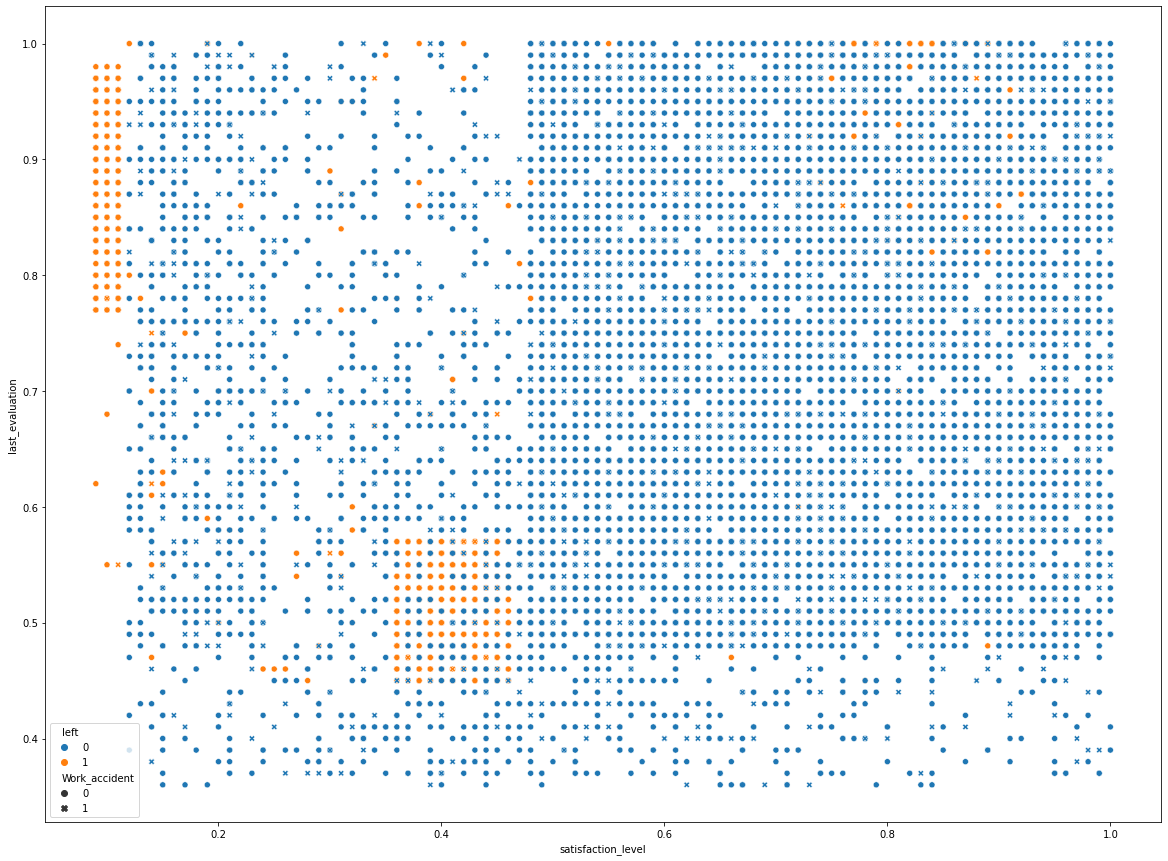

In [29]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_dataset,x='satisfaction_level',y='last_evaluation',hue='left',style='Work_accident');

#### A few having good satisfaction and performance but with work accident left the company,reason may be the underlying accident.

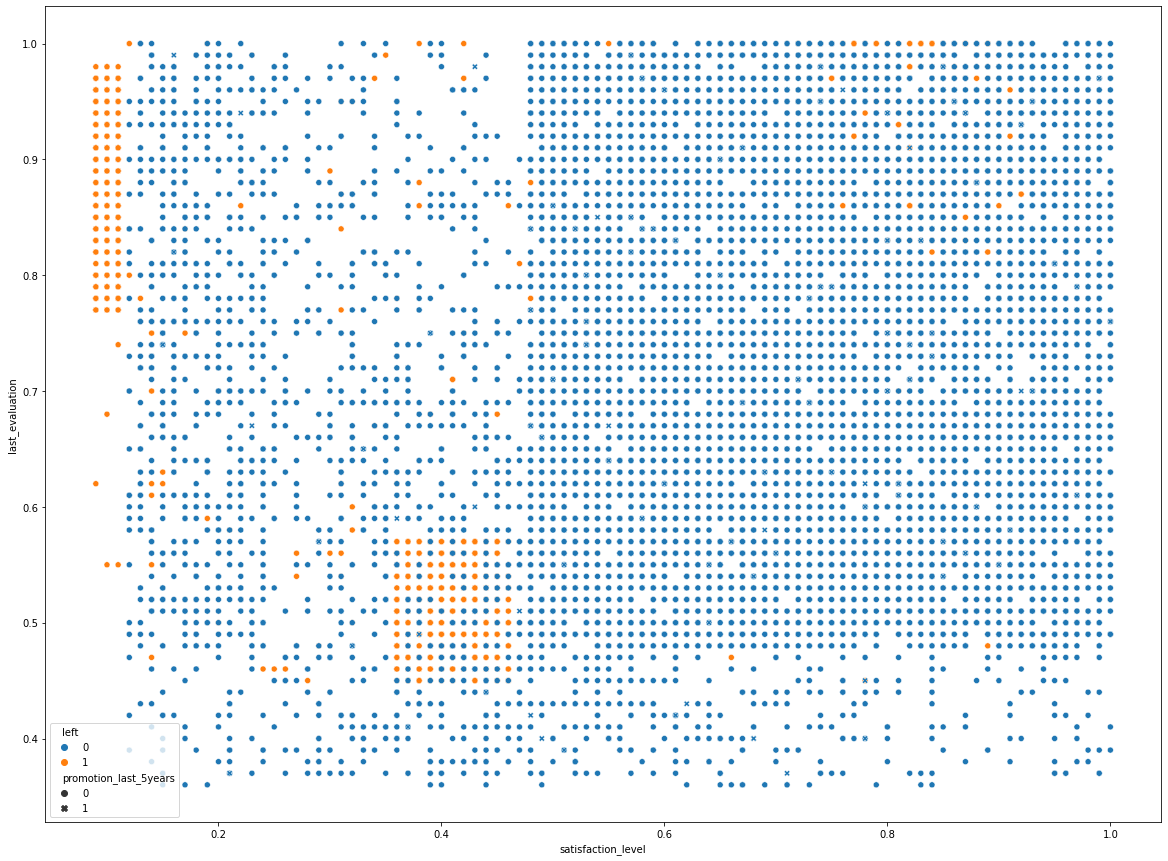

In [30]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_dataset,x='satisfaction_level',y='last_evaluation',hue='left',style='promotion_last_5years');

#### Majority of the employees with good performance who left the company were those with no promotion from last 5 years.

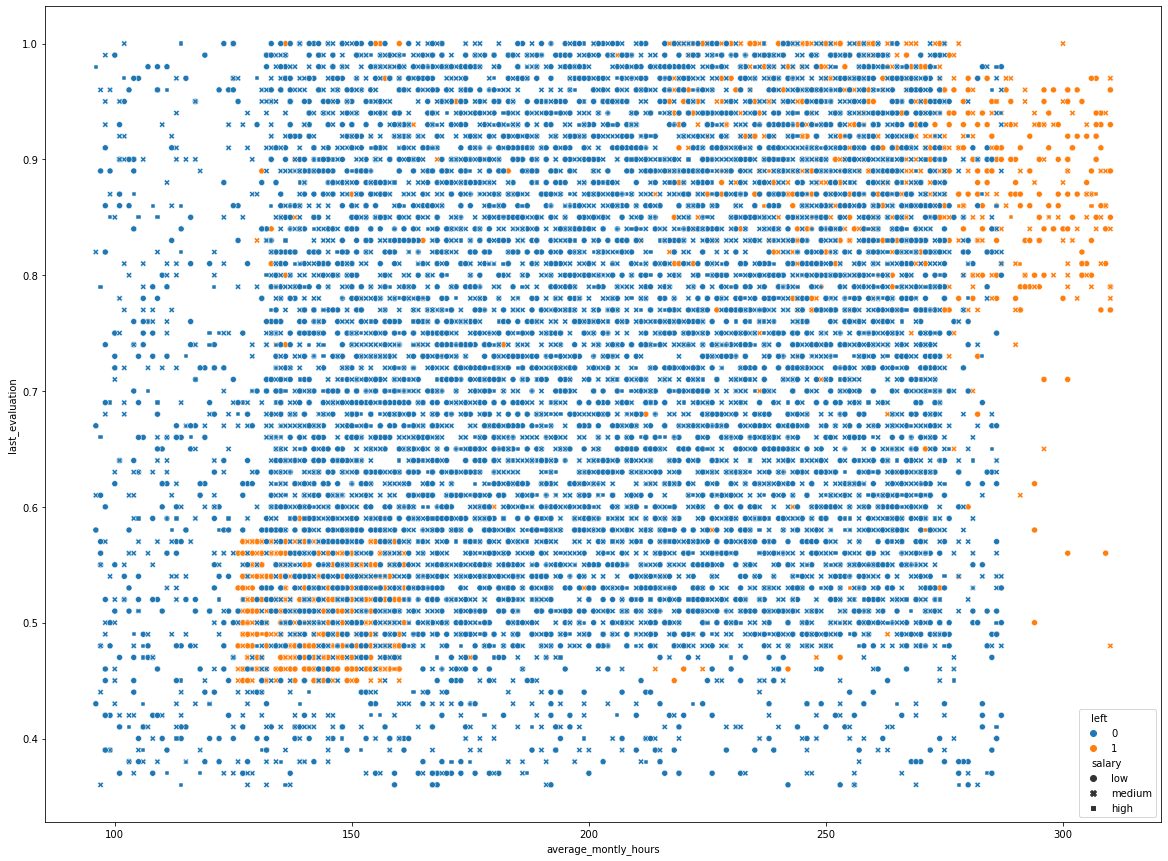

In [31]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df_dataset,y='last_evaluation',x=df_dataset['average_montly_hours'],hue='left',style='salary');

#### From different visualisation it may infer that the employees with high performance are not getting acceptable salary fro their work load.

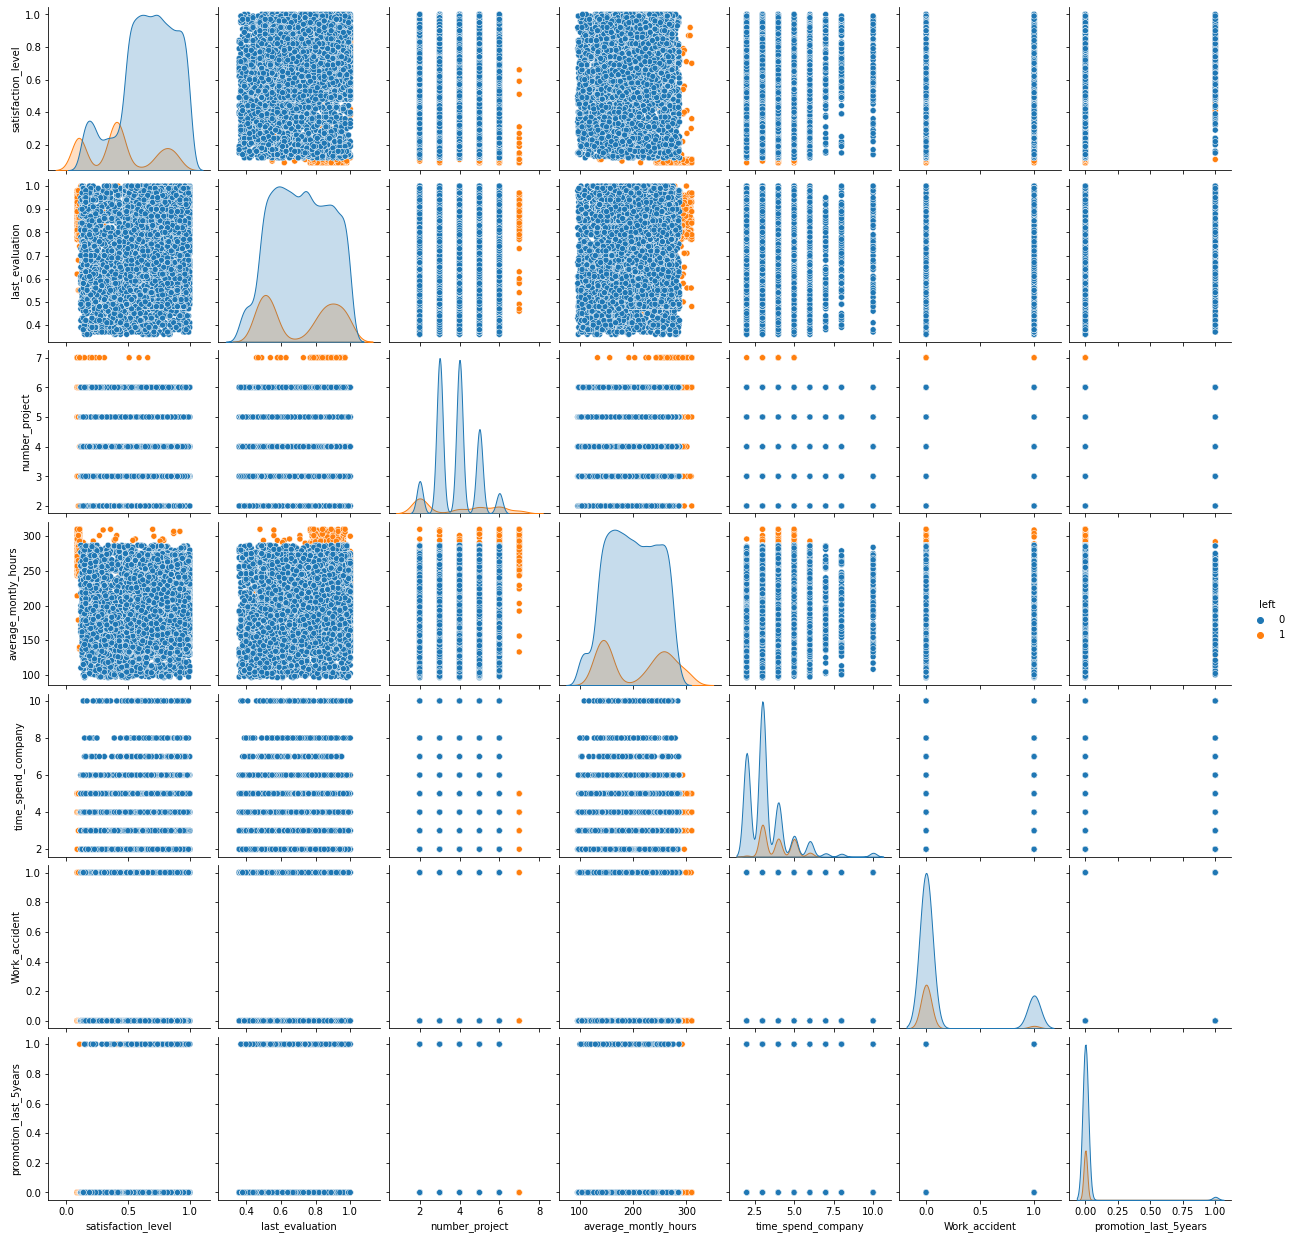

In [59]:
sns.pairplot(df_dataset,hue="left");

##### Pair plot also supports the above inference

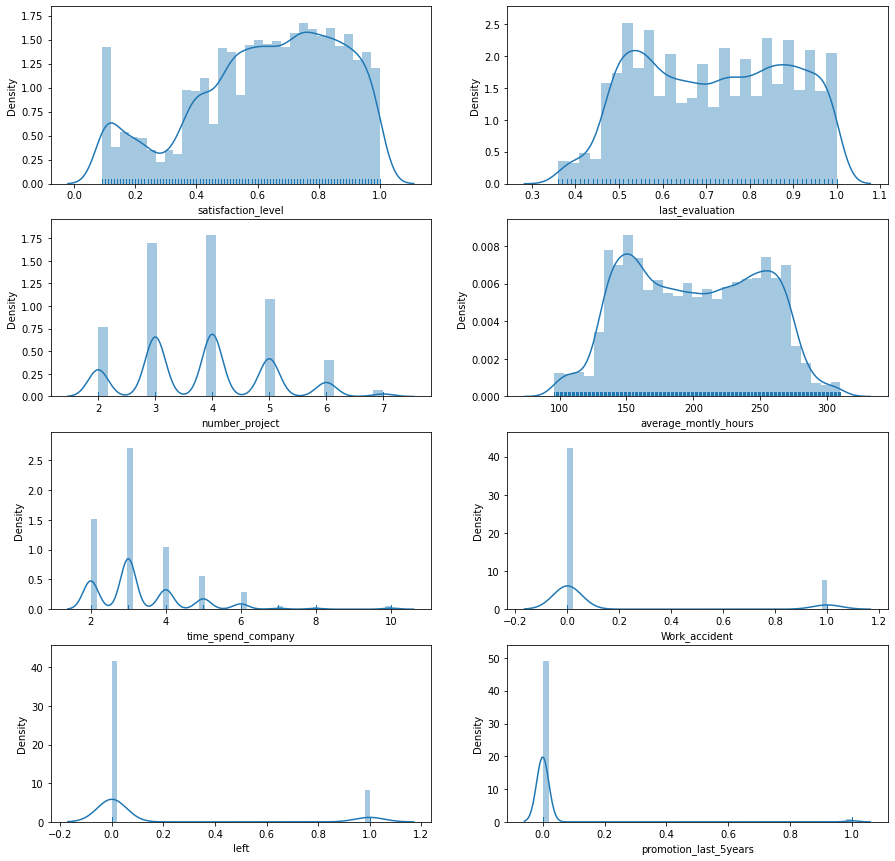

In [33]:
#distribution of variables
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_dataset.drop(['salary','Departments '],axis=1),ax.flatten()):
    sns.distplot(df_dataset[column],rug=True,ax=subplot)

In [34]:
#Now check for the outliers in the features

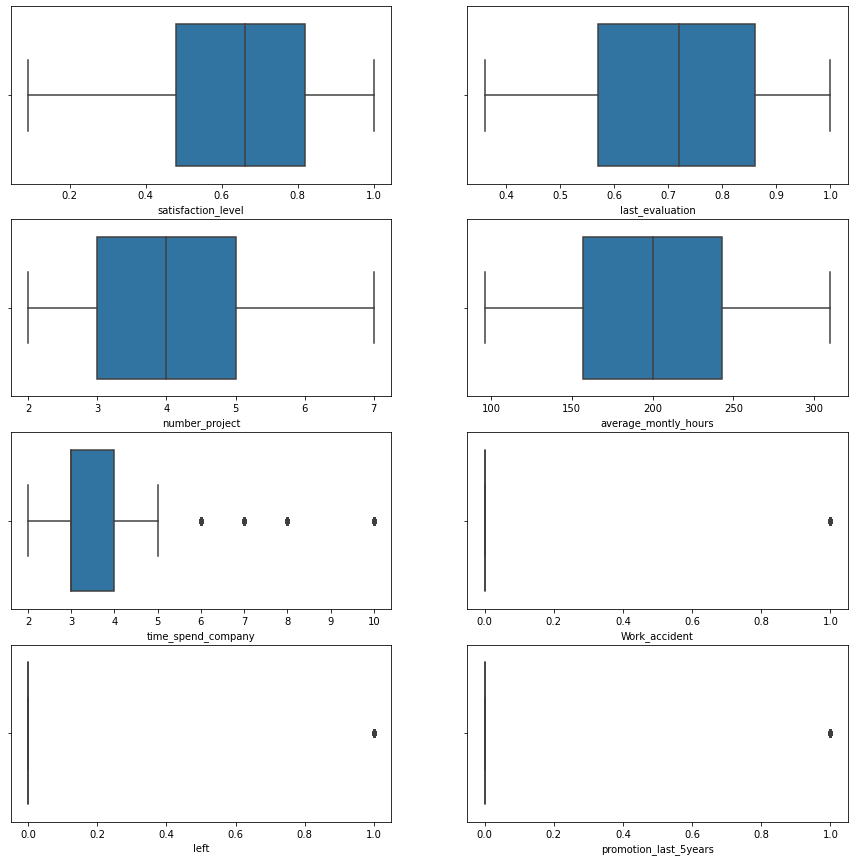

In [35]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_dataset.drop(['salary','Departments '],axis=1),ax.flatten()):
    sns.boxplot(x=column,data=df_dataset,ax=subplot)

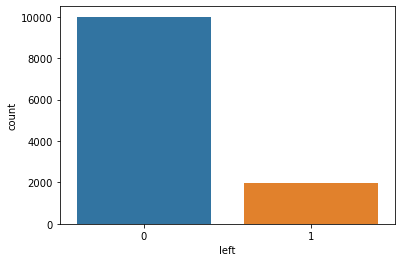

In [36]:
sns.countplot(df_dataset['left']);

##### Dataset is imbalanced,so sampling has to be done

In [37]:
#check the correlation between the variables
corr_matrix=df_dataset.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


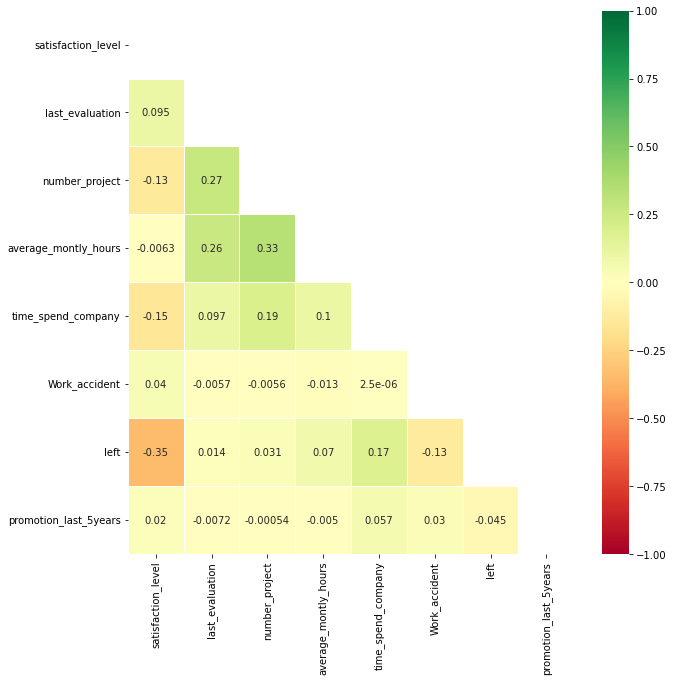

In [38]:
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,annot=True,cmap='RdYlGn',mask=mask,linecolor='white',linewidths=0.5)
plt.show()

In [39]:
#The feature 'satisfaction_level' only has a low negative correlation with the output feature 'left'.
#no multicollinearity so proceed with all the features for training the dataset

##### Training and Testing dataset

In [40]:
X=df_dataset.drop(['left'],axis=1)

In [41]:
y=df_dataset['left']

In [42]:
X.shape

(11991, 9)

In [43]:
preprocessor=ColumnTransformer(transformers=
    [
        ('ohe_encoder',OneHotEncoder(sparse=False,drop='first'),['Departments ']),
        ('ord_encoder',OrdinalEncoder(categories=[['low','medium','high']]),['salary']),
        ('std_scaler',StandardScaler(),['average_montly_hours'])
    ],remainder='passthrough'
)

In [44]:
X=preprocessor.fit_transform(X)

In [45]:
df_dataset['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [47]:
#!pip install imbalanced-learn

In [48]:
from imblearn.over_sampling import RandomOverSampler
#os=RandomOverSampler(sampling_strategy='minority')
os=RandomOverSampler(random_state=42)


In [49]:
X_train,y_train=os.fit_resample(X_train,y_train)

In [50]:
X_train.shape,y_train.shape

((14010, 17), (14010,))

In [51]:
models = {
    'support vector classifier' : SVC(kernel='rbf'),
    'KNeighbors classifier' : KNeighborsClassifier(), 
    #'MultinomialNB': MultinomialNB(), 
    'Decision Tree': DecisionTreeClassifier(), 
    'Logistic regression': LogisticRegression(), 
    'Random Forest': RandomForestClassifier(), 
    'AdaBoost': AdaBoostClassifier(), 
    'Bagging classifier':BaggingClassifier(), 
    'Extra trees classifier': ExtraTreesClassifier(),
    'Gradient boosting':GradientBoostingClassifier(),
    'xgb classifier':XGBClassifier()
}

In [52]:
def evaluate_train_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    accuracy=accuracy_score(true, predicted)
    
    return mae, rmse,accuracy

In [53]:
def evaluate_test_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    accuracy=accuracy_score(true, predicted)
    recall=recall_score(true, predicted)
    precision=precision_score(true, predicted)
    confus_matrix=confusion_matrix(true, predicted)
    class_report=classification_report(true, predicted)
    
    return mae, rmse,accuracy,recall,precision,confus_matrix,class_report

In [54]:
model_list=[]
accuracy_scores=[]
recall_scores=[]
precision_scores=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    #train the model
    model.fit(X_train,y_train)
    
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    
     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse,model_train_acc= evaluate_train_model(y_train, y_train_pred)

    test_mae,test_rmse,test_acc,test_recall,test_prec,con_matrix,classficn_report = evaluate_test_model(y_test, y_test_pred)
    
    print(list(models.keys())[i],'\n')
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Accuracy: {:.4f}".format(model_train_acc))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(test_mae))
    print("- Accuracy: {:.4f}".format(test_acc))
    print("confusion_matrix",con_matrix)
    print("classification_report",classficn_report)
    
    accuracy_scores.append(test_acc)
    recall_scores.append(test_recall)
    precision_scores.append(test_prec)
    
    print('='*45)
    print('\n')
    
    
    

support vector classifier 

Model performance for Training set
- Root Mean Squared Error: 0.2654
- Mean Absolute Error: 0.0704
- Accuracy: 0.9296
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2704
- Mean Absolute Error: 0.0731
- Accuracy: 0.9269
confusion_matrix [[2781  214]
 [  49  554]]
classification_report               precision    recall  f1-score   support

           0       0.98      0.93      0.95      2995
           1       0.72      0.92      0.81       603

    accuracy                           0.93      3598
   macro avg       0.85      0.92      0.88      3598
weighted avg       0.94      0.93      0.93      3598



KNeighbors classifier 

Model performance for Training set
- Root Mean Squared Error: 0.1851
- Mean Absolute Error: 0.0343
- Accuracy: 0.9657
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2978
- Mean Absolute Error: 0.0887
- Accuracy: 0.9113
confusion_matrix [[

In [55]:
model_performances = pd.DataFrame({'Algorithm':models.keys(),'Accuracy':accuracy_scores,'Recall':recall_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [56]:
model_performances

,Algorithm,Accuracy,Recall,Precision
9,xgb classifier,0.981101,0.920398,0.965217
4,Random Forest,0.980545,0.903814,0.978456
6,Bagging classifier,0.979711,0.908789,0.968198
7,Extra trees classifier,0.978321,0.900498,0.967914
2,Decision Tree,0.971651,0.917081,0.914050
8,Gradient boosting,0.968316,0.928690,0.887480
5,AdaBoost,0.942746,0.930348,0.773793
0,support vector classifier,0.926904,0.918740,0.721354
1,KNeighbors classifier,0.911340,0.917081,0.672749
3,Logistic regression,0.777932,0.840796,0.419008


#### Data Prediction

In [58]:
xgb_model = XGBClassifier()
xgb_model = xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)
#print(" Accuracy of the model is {:.2f}" .format(score))

 Accuracy of the model is 98.11
